# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Kuznetsova Alexandra*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import numpy.random as rnd
import pandas as pd
%matplotlib inline

## Model A 

1) In order to generate the network ($n>1000$) I've decided firstly to create the initial Erdos-Renyi random graph on the $n = 100$ edges with the probability $p = 0.1$. You can see the distribution of the degrees in the initial graph at the first picture.

In [2]:
def randgp (n, p):
    G = nx.Graph()
    G.add_nodes_from(range(0,n))
    
    for i in range(0,n-1):
        for j in range(i+1,n):
            if rnd.uniform(0,1,1)[0] <= p:
                G.add_edge(i,j)
        
    return G

n = 100
p = 0.1
G = randgp(n,p)


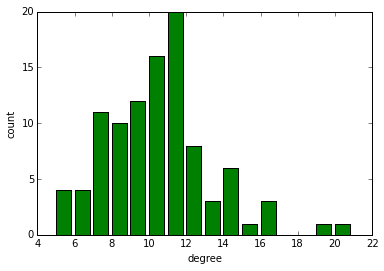

In [4]:
# degree distribution in the initial graph
degrees = {}
for n in G.nodes_iter():
    d = G.degree(n)
    if d in degrees:
        degrees[d] += 1
    else:
        degrees[d] = 1

plt.bar(degrees.keys(), degrees.values(), facecolor = 'g')
plt.ylabel('count')
plt.xlabel('degree')

On the next step it is needed to start the growth process, based on the initial graph. At the each timestep a new node is added and, according to the Model A, this node is connected to the other with $m$ edges. There are 1000 nodes added.

In [5]:
m = 10
for t in range(n, n+1001):
    G.add_node(t)
    s = rnd.uniform(0,1,t-1)
    ind = np.argsort(s)[len(s)-m:len(s)]
    for j in ind:
        G.add_edge(t,j)

In [6]:
deg = np.zeros(len(nx.nodes(G)))
for i in range(0, len(nx.nodes(G))):
    deg[i] = nx.degree(G)[i]

2) The next two graphs show the probability density function and cumulative density function for the obtained degrees distribution.

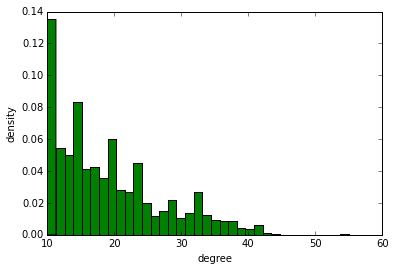

In [7]:
# degree distribution in the final graph (pdf)
n, bins, patches = plt.hist(deg, 35, normed=1, facecolor='g')
plt.xlabel('degree')
plt.ylabel('density')

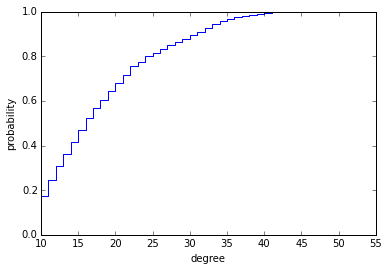

In [8]:
# cdf

d = len(np.unique(deg))

cdf = np.zeros(d)
npdeg = np.array(deg)
for i in range(0,d):
    cdf[i] = (sum(npdeg<=np.sort(np.unique(npdeg))[i]))/(len(nx.nodes(G)))
    
plt.step(np.unique(deg), cdf)
plt.xlabel('degree')
plt.ylabel('probability')

The summary statistics for the obtained sample of degrees are demonstrated in the following table. The mean value equals to 19, while the median value is 17 and the maximum is 55.

In [9]:
pddeg = pd.Series(deg)
pddeg.describe()

count    1100.000000
mean       19.118182
std         7.979081
min        10.000000
25%        13.000000
50%        17.000000
75%        23.000000
max        55.000000
dtype: float64

3) Let's simulate the graph construction for the different numbers of nodes added on the step of growth. I've tried the range of ten values of this number: from 1000 to 1900 with the step 100. The average path and the clustering coefficient have been counted for each graph.

In [ ]:
# initial graph
n = 100
p = 0.1
G = randgp(n,p)

# calculation of the average path in the graph and clustering coefficient
k = 0
avpath = np.zeros(10)
ccoef = np.zeros(10)
for i in range(1000, 1901, 100):
    M = G
    m = 10
    for t in range(n, n+i):
        M.add_node(t)
        s = rnd.uniform(0,1,t-1)
        ind = np.argsort(s)[len(s)-m:len(s)]
        for j in ind:
            M.add_edge(t,j)
    avpath[k] = nx.average_shortest_path_length(M)
    ccoef[k] = nx.transitivity(M)
    k = k+1
    print(k)
    print(avpath)

The next graph shows the relation between the average shortest path in the graph and the number of nodes. There is the strong inverse relation, which means, that the connections in the graph become tighter with the growing.

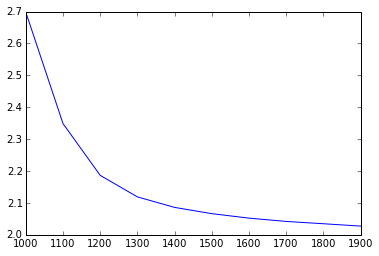

In [180]:
plt.plot(range(1000,1901,100), avpath)

The relation between the value of the clustering coefficient and the number of nodes is direct: the more the number of nodes, the more the clustering coefficient of the graph.

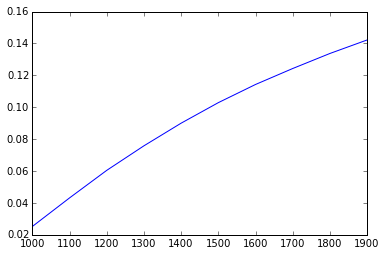

In [173]:
plt.plot(range(1000,1901,100), ccoef)

In [ ]:
# the relation between degree and age of node
M = G
m = 10
sumdeg = np.zeros(1001)
numnodes = np.zeros(1001)
for t in range(n, n+1000):
    M.add_node(t)
    s = rnd.uniform(0,1,t-1)
    ind = np.argsort(s)[len(s)-m:len(s)]
    for j in ind:
        M.add_edge(t,j)
    ind = np.array(nx.nodes(M))
    ind[ind<1000] = t-n+1
    ind[ind>1000] = ind[ind>1000] - 1000 
    deg = np.zeros(len(nx.nodes(M)))
    for i in range(0, len(nx.nodes(M))):
            deg[i] = nx.degree(M)[i]
    npdeg = np.array(deg)
    for l in np.unique(ind):
        sumdeg[l] = sumdeg[l]+sum(npdeg[ind==l])
        numnodes[l] = numnodes[l]+sum(ind==l) 
   

The next graph demonstrates the dependancy of the node degree from its age. In our case, there are totally 1000 timesteps.  It can be seen, that there are some fluctuations for the "young" nodes, but indeed the whole function is concave.  

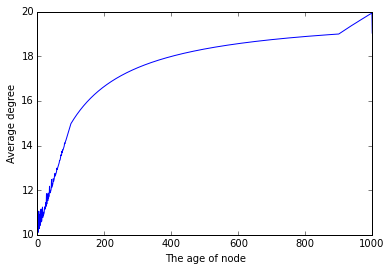

In [9]:
plt.plot(range(0,1001), sumdeg/numnodes)
plt.ylabel('Average degree')
plt.xlabel('The age of node')

4) According to the three graphs above, we can conclude that the scale-free property is not relevant to this model: both average path and clustering coefficient have a relation with the number of nodes in the graph.

## Model B 

This model demonstrates the effects of the absence of growing. At the first step I've generated the empty graph with $n = 1000$ nodes, then during the 10000 timesteps the $m=10$ edges were added according to the prefferential attachment.

In [3]:
# initial empty graph
n = 1000
G2 = nx.Graph()
G2.add_nodes_from(range(0,n))

# prefferential attachment without growth
m = 10

setnodes = []
for i in range(0,len(nx.nodes(G2))):
    setnodes.append(nx.nodes(G2)[i])

for t in range(0,10000):
    h = len(setnodes)
    rndnode = setnodes[rnd.randint(0,h)]
    f = rnd.randint(0,h,m)
    ind = np.zeros(m)
    k = 0
    for i in f:
        ind[k] = setnodes[i]
        k = k+1
    for j in ind:
        if j!= rndnode:
            G2.add_edge(rndnode,j)
            setnodes.append(j)
            setnodes.append(rndnode)

The next two graphs show the distribution of the degrees values.

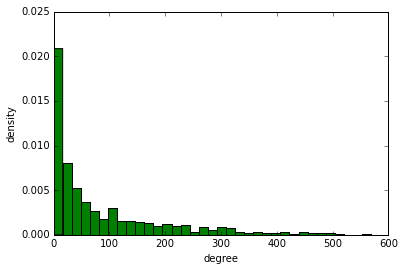

In [14]:
deg = np.zeros(len(nx.nodes(G2)))
for i in range(0, len(nx.nodes(G2))):
    deg[i] = nx.degree(G2)[i]
# degree distribution in the final graph (pdf)
n, bins, patches = plt.hist(deg, 35, normed=1, facecolor='g')
plt.ylabel('density')
plt.xlabel('degree')

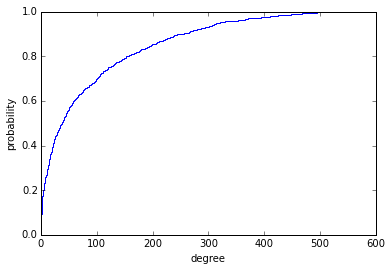

In [15]:
# cdf

d = len(np.unique(deg))

cdf = np.zeros(d)
npdeg = np.array(deg)
for i in range(0,d):
    cdf[i] = (sum(npdeg<=np.sort(np.unique(npdeg))[i]))/(len(nx.nodes(G2)))
    
plt.step(np.unique(deg), cdf)
plt.xlabel('degree')
plt.ylabel('probability')

The summary statistics for the degrees are in the following table. According to it, the mean degree equals to almost 78, the median value is only 30 and the maximum is 604.

In [87]:
pddeg = pd.Series(deg)
pddeg.describe()

count    1000.000000
mean       77.886000
std       104.382953
min         0.000000
25%         6.000000
50%        30.000000
75%       110.250000
max       604.000000
dtype: float64

For the following ananlysis it is needed to count the values of the shortest average path and the value of the clustering coefficient. The problem is that the final graph often is not connected, so I pick the biggest connected subgraph and use it for calculation. This subgraph is always contains almost all nodes, so I think it reflects the properties of the whole graph correctly.

In [ ]:
k = 0
m = 10
avpath = np.zeros(16)
ccoef = np.zeros(16)
for i in range(1000, 4001, 200):
    # initial empty graph
    n = i
    G2 = nx.Graph()
    G2.add_nodes_from(range(0,n))
    
    setnodes = []
    for j in range(0,len(nx.nodes(G2))):
        setnodes.append(nx.nodes(G2)[j])
    
    for t in range(0,10000):
        h = len(setnodes)
        rndnode = setnodes[rnd.randint(0,h)]
        f = rnd.randint(0,h,m)
        ind = np.zeros(m)
        p = 0
        for r in f:
            ind[p] = setnodes[r]
            p = p+1
        for j in ind:
            if j!= rndnode:
                G2.add_edge(rndnode,j)
                setnodes.append(j)
                setnodes.append(rndnode)
    largest_cc = max(nx.connected_components(G2), key=len)
    G3 = G2.subgraph(largest_cc)
    avpath[k] = nx.average_shortest_path_length(G3)
    ccoef[k] = nx.transitivity(G3)
    k = k+1
    print(k)
    print(avpath)
    print(ccoef)

3) The graph below shows the direct relation between the average shortest path in the graph and the number of nodes in the graph. This result is opposite to the result in the previous model, but it is meaningful for this model, because there are more nodes in the graph, but the number of edges remains the same.

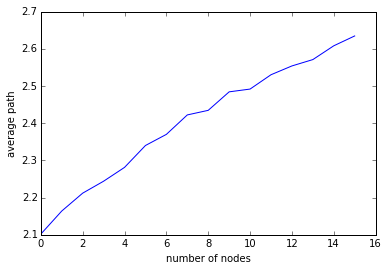

In [15]:
plt.plot(avpath)
plt.ylabel('average path')
plt.xlabel('number of nodes')

This graph demonstrates the inverse relation between the clustering coefficient and the number of nodes. The interpretation of this result is the same as in the previous task.

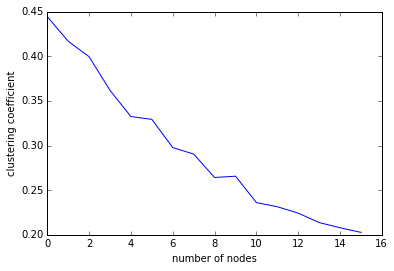

In [16]:
plt.plot(ccoef)
plt.ylabel('clustering coefficient')
plt.xlabel('number of nodes')

In [5]:
# the relation between degree and age of node
agedegree = np.zeros(10000)

# initial empty graph
n = 1000
G2 = nx.Graph()
G2.add_nodes_from(range(0,n))

# prefferential attachment without growth
m = 10

setnodes = []
for i in range(0,len(nx.nodes(G2))):
    setnodes.append(nx.nodes(G2)[i])

deg = np.zeros(len(nx.nodes(G2)))

for t in range(0,10000):
    h = len(setnodes)
    rndnode = setnodes[rnd.randint(0,h)]
    f = rnd.randint(0,h,m)
    ind = np.zeros(m)
    k = 0
    for i in f:
        ind[k] = setnodes[i]
        k = k+1
    for j in ind:
        if j!= rndnode:
            G2.add_edge(rndnode,j)
            setnodes.append(j)
            setnodes.append(rndnode)
            deg[j] = deg[j]+1
            deg[rndnode] = deg[rndnode]+1
    agedegree[t] = sum(deg)/len(nx.nodes(G2))

The relation between the average degree and the age of nodes is linear, because on the each step the fixed number of edges $m$ is added.  

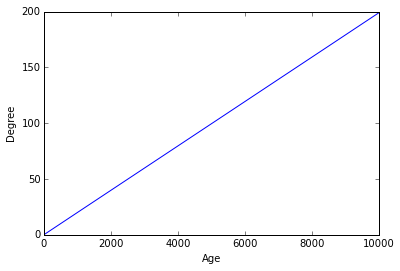

In [12]:
plt.plot(range(0,10000),agedegree)
plt.ylabel('Degree')
plt.xlabel('Age')

4) For this model and value of the parameter $m$ the scale-free property does not hold.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

1) Generation of the model

In [37]:
# the initial graph
n = 20
p = 0.1
q = 0.4
G = randgp(n,p)

# vertex copying model

for t in range(0,1000):
    rndnode = nx.nodes(G)[rnd.randint(0,len(nx.nodes(G)))]
    G.add_node(n+t)
    for i in range(0,len(nx.edges(G,rndnode))):
        if rnd.uniform(0,1,1)<=q:
            G.add_edge(n+t, nx.edges(G,rndnode)[i][1])
        else:
            rndnode2 = nx.nodes(G)[rnd.randint(0,len(nx.nodes(G)))]
            G.add_edge(n+t, rndnode2)

2) The obtained distribution looks similar to the normal distribution

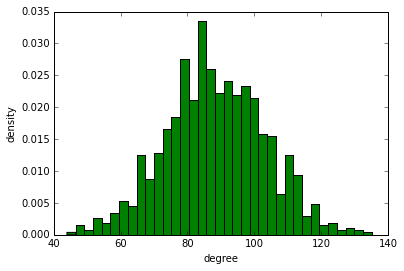

In [39]:
deg = np.zeros(len(nx.nodes(G)))
for i in range(0, len(nx.nodes(G))):
    deg[i] = nx.degree(G)[i]
    
# degree distribution in the final graph (pdf)
n, bins, patches = plt.hist(deg, 35, normed=1, facecolor='g')
plt.xlabel('degree')
plt.ylabel('density')
    

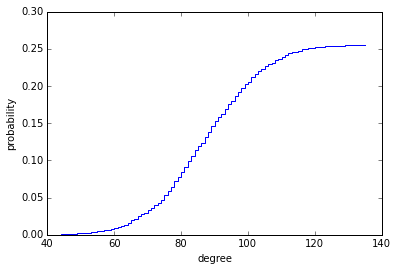

In [40]:
# cdf

d = len(np.unique(deg))

cdf = np.zeros(d)
npdeg = np.array(deg)
for i in range(0,d):
    cdf[i] = (sum(npdeg<=np.sort(np.unique(npdeg))[i]))/(len(nx.nodes(G2)))
    
plt.step(np.unique(deg), cdf)
plt.xlabel('degree')
plt.ylabel('probability')

In [41]:
pddeg = pd.Series(deg)
pddeg.describe()

count    1020.000000
mean       88.156863
std        14.907267
min        44.000000
25%        78.000000
50%        88.000000
75%        98.000000
max       135.000000
dtype: float64

3) The analysis of the properties of obtained model:

In [8]:
avpath = np.zeros(5)
ccoef = np.zeros(5)
k = 0

n = 20
p = 0.1
q = 0.4
G = randgp(n,p)

for r in range(1000, 3001, 500):
    for t in range(0,2000):
        rndnode = nx.nodes(G)[rnd.randint(0,len(nx.nodes(G)))]
        G.add_node(n+t)
        for i in range(0,len(nx.edges(G,rndnode))):
            if rnd.uniform(0,1,1)<=q:
                G.add_edge(n+t, nx.edges(G,rndnode)[i][1])
            else:
                rndnode2 = nx.nodes(G)[rnd.randint(0,len(nx.nodes(G)))]
                G.add_edge(n+t, rndnode2)
    avpath[k] = nx.average_shortest_path_length(G)
    ccoef[k] = nx.transitivity(G)
    k = k+1

1
[ 1.93200754  1.68347424  0.          1.91487355  0.        ]
[ 0.07554979  0.33299008  0.          0.08631164  0.        ]


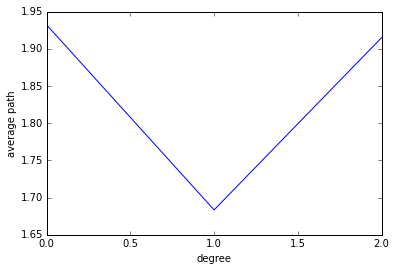

In [13]:
plt.plot(avpath)
plt.ylabel('average path')
plt.xlabel('degree')

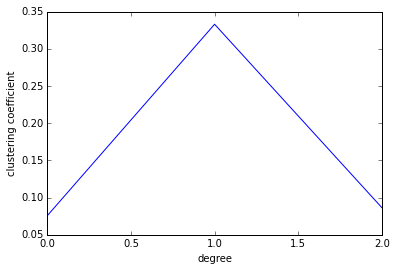

In [15]:
plt.plot(ccoef)
plt.ylabel('clustering coefficient')
plt.xlabel('degree')